# Regression

Regression is a statistical analysis technique used to model the relationship between a dependent variable (also known as the response or target variable) and one or more independent variables (also known as predictors or features). The goal of regression analysis is to understand and predict the value of the dependent variable based on the values of the independent variables.


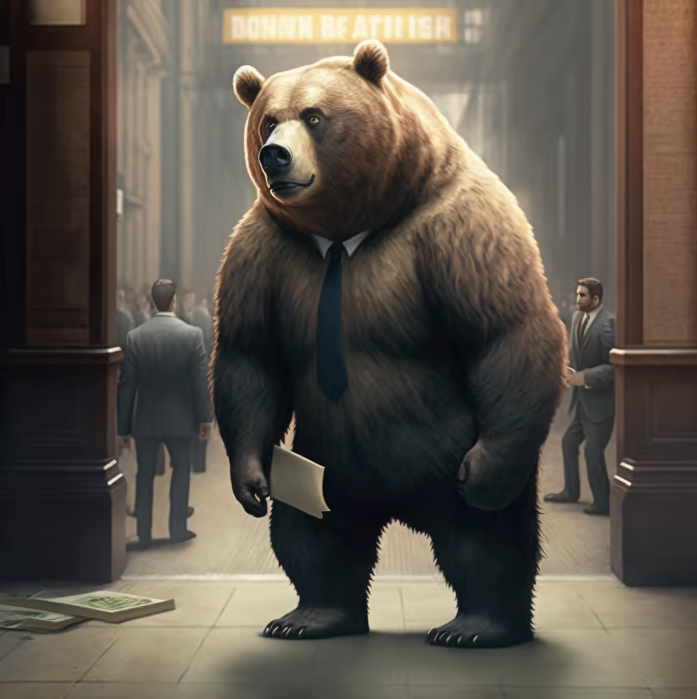
<br>
"Bear Stearns" by Midjourney

In this section, you are going to build a loan interest rate prediction model using regression.

## Data Preprocessing (9 pts)

There were apparently some researchers who were kidnapped during the survey by the Harkonnens which led to incomplete data.
** **
In this section, you are going to load the dataset and drop irrelevant column(s). 

Next, check for missing values and total number of duplicates. You will fill the missing values with the mode of the corresponding feature and print such features.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#loading the data
 ### WRITE YOUR CODE ###
df = pd.read_csv('loans.csv')
df.head()
#num_row, num_col = loans_df.shape

#dropping the irrelevant column
### WRITE YOUR CODE ###
df.drop(df.columns[[0, 1]], axis=1, inplace=True)

#check each feature for missing values and handle them 
### WRITE YOUR CODE ###
df.info()
df = df.fillna(method='ffill')
#col_with_high_na = ['Employment_Length']
#df_records_dropped = df.dropna(axis=0, subset = col_with_high_na)
df.info()


#checking num_duplicates
### WRITE YOUR CODE ###
duplicate_rows = df[df.duplicated()]
duplicate_rows.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2500 non-null   int64  
 1   Amount_Funded_By_Investors      2500 non-null   float64
 2   Interest_Rate                   2500 non-null   float64
 3   Loan_Length                     2499 non-null   float64
 4   Loan_Purpose                    2499 non-null   object 
 5   Debt_To_Income_Ratio            2500 non-null   float64
 6   Home_Ownership                  2500 non-null   object 
 7   Monthly_Income                  2500 non-null   float64
 8   Open_CREDIT_Lines               2500 non-null   int64  
 9   Revolving_CREDIT_Balance        2500 non-null   int64  
 10  Inquiries_in_the_Last_6_Months  2500 non-null   int64  
 11  Employment_Length               2422 non-null   float64
dtypes: float64(6), int64(4), object(2)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length


In [2]:
df.head(5)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000,20000.0,0.09,36.0,debt_consolidation,0.15,MORTGAGE,6541.67,14,14272,2,1.0
1,19200,19200.0,0.12,36.0,debt_consolidation,0.28,MORTGAGE,4583.33,12,11140,1,2.0
2,35000,35000.0,0.22,60.0,debt_consolidation,0.24,MORTGAGE,11500.00,14,21977,1,2.0
3,10000,9975.0,0.10,36.0,debt_consolidation,0.14,MORTGAGE,3833.33,10,9346,0,5.0
4,12000,12000.0,0.12,36.0,credit_card,0.19,RENT,3195.00,11,14469,0,9.0


## Exploratory Data Analysis (18 pts)

Visualize the the interest rates corresponding to different Home_Ownership and Loan_Length parameters.
*   Create a new figure with a size of (10,5).
*   On a bar plot, represent the 'Home_Ownership' column in x-axis and the 'Interest_Rate' column in y-axis.
*   Hue would be according to the Loan_Length.
* Show the plot.



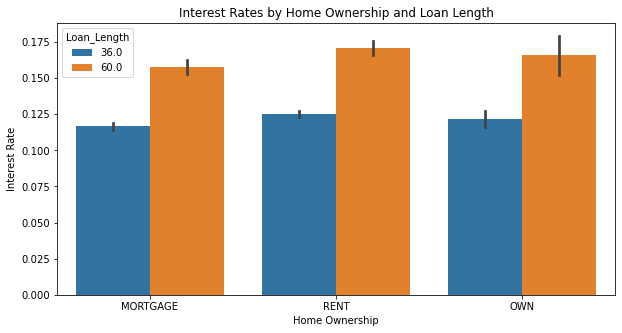

In [3]:
### WRITE YOUR CODE ###
plt.figure(figsize=(10, 5))

# Plot the bar chart
sns.barplot(x='Home_Ownership', y='Interest_Rate', hue='Loan_Length', data=df)

# Set the title and labels
plt.title("Interest Rates by Home Ownership and Loan Length")
plt.xlabel("Home Ownership")
plt.ylabel("Interest Rate")

# Show the plot
plt.show()

Create a pie plot to demonstrate the share of distribution in home ownership.

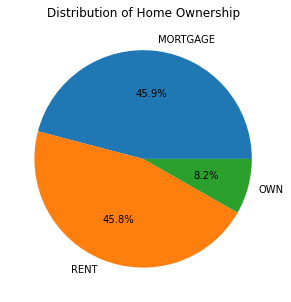

In [4]:
### WRITE YOUR CODE ###
ownership_distribution = df['Home_Ownership'].value_counts()

# Create a new figure with size (10,5)
plt.figure(figsize=(10, 5))

# Plot the pie chart
plt.pie(ownership_distribution, labels=ownership_distribution.index, autopct='%1.1f%%')

# Set the title
plt.title("Distribution of Home Ownership")

# Show the plot
plt.show()

Check the data types for each feature and convert the categorical features into numerical values.

**Hint:** You can use the "get_dummies" function of Pandas library.

In [5]:
df.dtypes

Amount_Requested                    int64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
Home_Ownership                     object
Monthly_Income                    float64
Open_CREDIT_Lines                   int64
Revolving_CREDIT_Balance            int64
Inquiries_in_the_Last_6_Months      int64
Employment_Length                 float64
dtype: object

In [6]:
### WRITE YOUR CODE ###
num_row, num_col = df.shape
print("Number of rows before the converting :", num_row)
print("Number of columns before the converting :", num_col)

df_new = pd.get_dummies(df)
num_row, num_col = df_new.shape
print("Number of rows after the converting:", num_row)
print("Number of columns after the converting :", num_col)

Number of rows before the converting : 2500
Number of columns before the converting : 12
Number of rows after the converting: 2500
Number of columns after the converting : 20


Create a heatmap to present the relationships between different features.

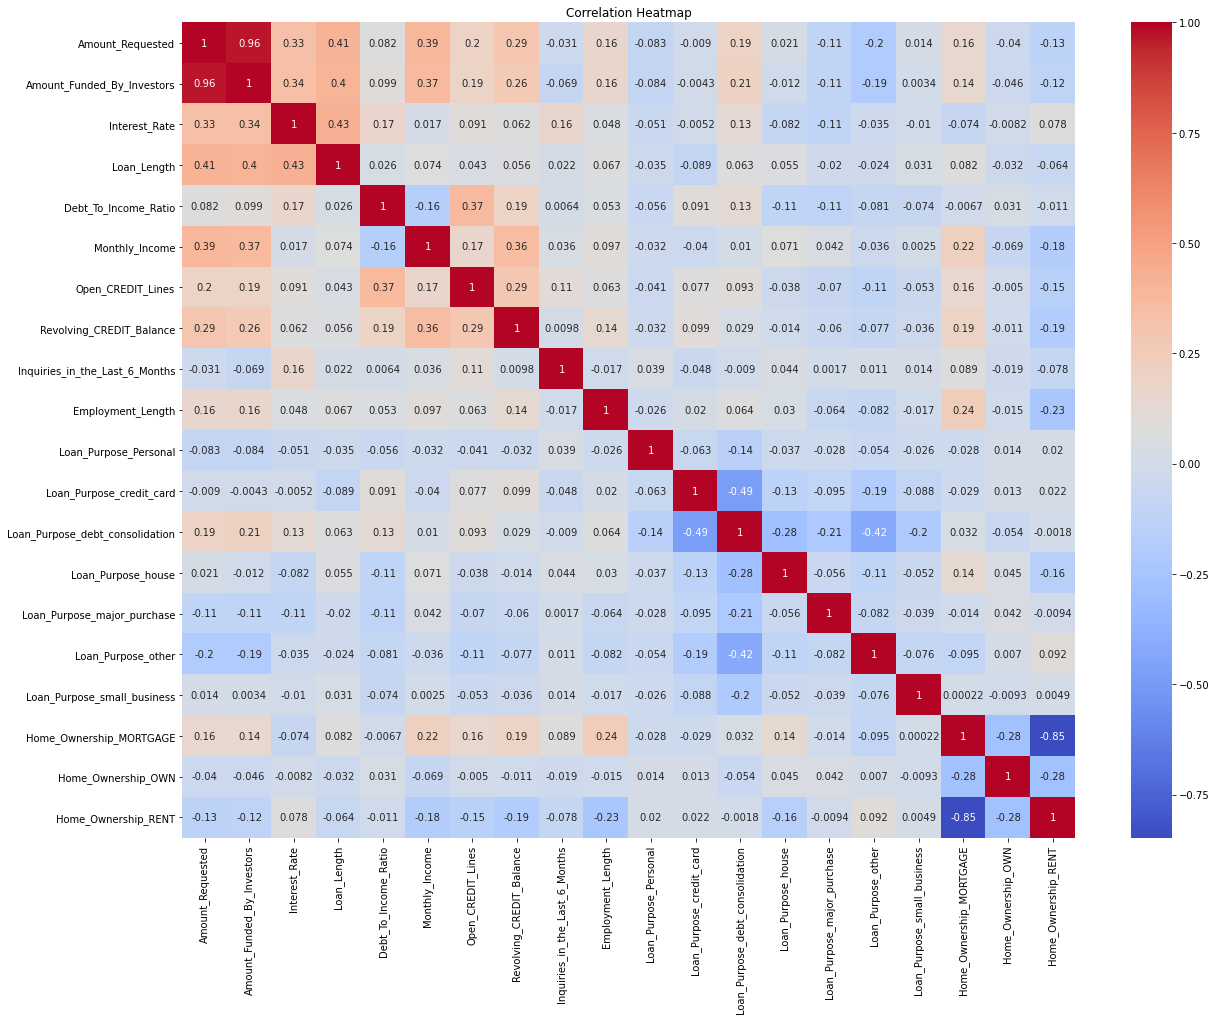

In [7]:
### WRITE YOUR CODE ###
corr_matrix = df_new.corr()

plt.figure(figsize=(20, 15))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

## Model Evaluation (15 pts)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Separate the data into features and labels.


In [9]:
#seperate the data into features and labels
### WRITE YOUR CODE ###
X = df[['Monthly_Income', 'Employment_Length']]
y = df['Amount_Requested']

Split the data into training and test data. You could use a ratio of 80/20.

In [10]:
### WRITE YOUR CODE ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a linear regression model on and report the MSE and R2 score on the training data.

In [11]:
# Train a linear regression model and predict
### WRITE YOUR CODE ###
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

# Calculate the Mean Squared Error (MSE) and R2 score on training data
### WRITE YOUR CODE ###
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)


# Print the MSE and R2 score on training data
### WRITE YOUR CODE ###
print("MSE on training data:", mse)
print("R2 score on training data:", r2)

MSE on training data: 50114462.24674178
R2 score on training data: 0.16447249559375177


Run the model on test data and report the MSE and R2 score.

In [12]:
# Predict the target variable on the test data
### WRITE YOUR CODE ###
y_test_pred = model.predict(X_test)


# Calculate the Mean Squared Error (MSE) and R2 score on the test data
### WRITE YOUR CODE ###
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the MSE and R2 score on the test data
### WRITE YOUR CODE ###
print("MSE on test data:", mse_test)
print("R2 score on test data:", r2_test)

MSE on test data: 53972703.23988609
R2 score on test data: 0.1721729300399628


# Experiment with Different Regression Models (8 pts)

Experiment with at least one alternative regression model.

Report the results in comparison with those of the linear regressor.

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Retrieve linear regressor metrics to print later on 
### WRITE YOUR CODE ###
X = df[['Monthly_Income', 'Employment_Length']]
y = df['Amount_Requested']


# Polynomial Regression or some other model 
### WRITE YOUR CODE ###

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train a linear regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions on the training data
y_train_pred = poly_model.predict(X_train_poly)


# Print the results
### WRITE YOUR CODE ###
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
print("MSE on training data:", mse)
print("R2 score on training data:", r2)


# Print the MSE and R2 score on the test data

y_test_pred = poly_model.predict(X_test_poly)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("MSE on test data:", mse_test)
print("R2 score on test data:", r2_test)



MSE on training data: 46457983.3122058
R2 score on training data: 0.22543471252915337
MSE on test data: 52140401.78716098
R2 score on test data: 0.20027655746346396


# Classification

Classification is a fundamental task in machine learning that is often used in conjunction with regression. The goal of a classification task is to train a machine learning algorithm to accurately assign a given set of features to the correct class. There are various types of classification tasks, such as image classification, text classification, and audio classification etc.

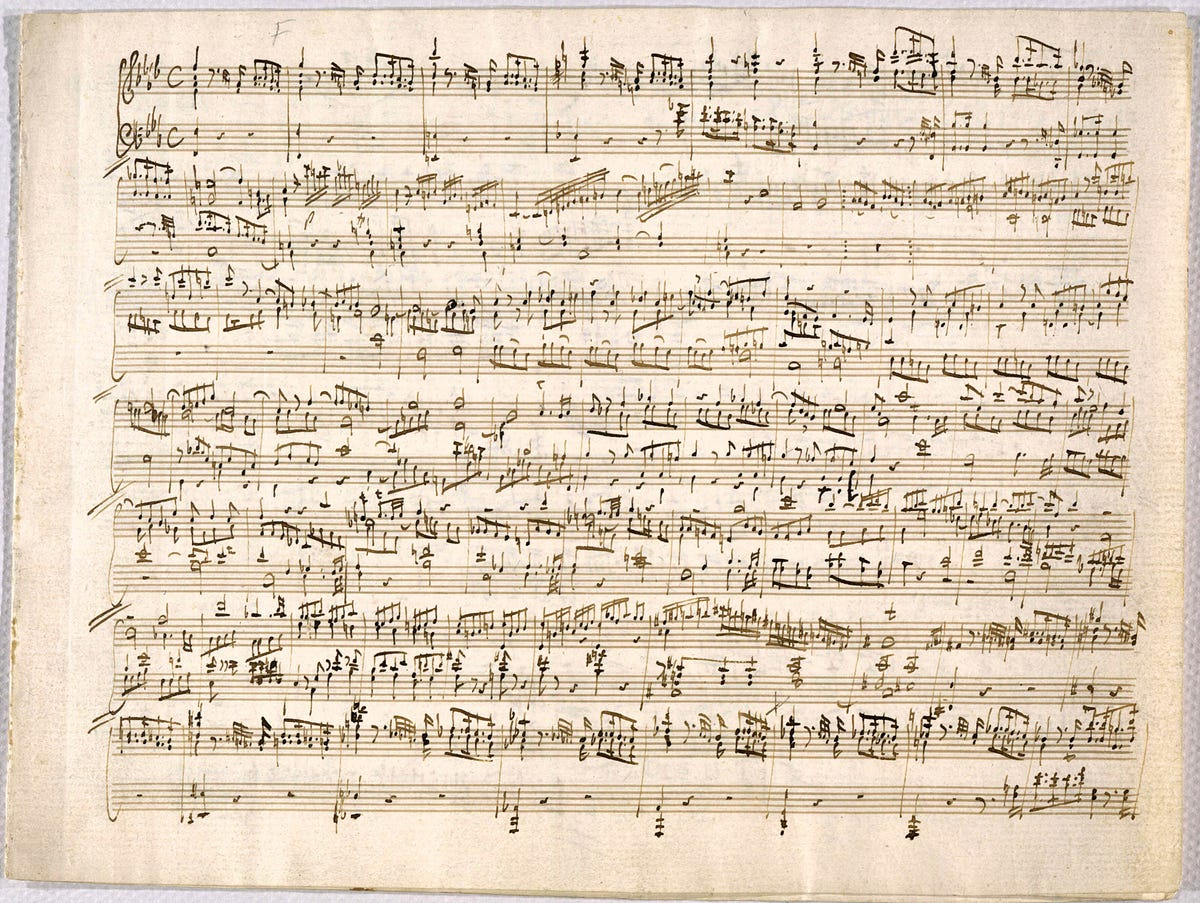

In this section, we are going to build and train a model which can figure out the composer from the notes and velocities that are in the song. These values are stored inside midi files. 

In [12]:
pip install pretty_midi

Processing ./Library/Caches/pip/wheels/96/4a/bd/ea2d2c62f684a0bcce6e6d277cb69e4463b5fd372c422c2481/pretty_midi-0.2.10-py3-none-any.whl
  Using cached mido-1.2.10-py2.py3-none-any.whl (51 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pretty_midi
import numpy as np
import os
#import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

Do not delete this function. We will use this function to extract the values we have talked before.

In [15]:
def extractNotesAndVelocities(path):
    # Reading the midi file
    midi_data = pretty_midi.PrettyMIDI(path)
    
    notes = np.array([])
    velocities = np.array([])

    # Extracting pitch and velocity values of each song 
    for instrument in midi_data.instruments:
      notes = np.append(notes, np.array([note.pitch for note in instrument.notes]))
      velocities = np.append(velocities, np.array([note.velocity for note in instrument.notes]))

    return notes, velocities

## Data Loading (10 pts)

Read the MIDI files in all the folders in the given root directory and store them in a dictionary. There are some corrupted files inside the folders so don't forget to write a code to bypass that. You can use the extractNotesAndVelocities function above to extract the needed values. (10 pts)

In [16]:
def createComposersDictionary(root_path):
    composers = {}
    
            
  # Extract notes and velocities of each song and 
  # store them in a dictionary with composer names as keys
  # Write a code to bypass corrupted files and print the filenames of the corrupted files

  ### WRITE YOUR CODE ###
    folders = ['Bach', 'Beethoven', 'Mozart', 'Schubert']       
    for folder in folders:
        dir_list_midis = os.listdir(root_path+"/"+folder) # we can achieve the path by using this
        noteslist = []
        for item in dir_list_midis:
            try:
                n,v = extractNotesAndVelocities(root_path+"/"+folder+"/"+item)
                noteslist.append(n)
                print(folder," ", item," is okay")
            except:
                print("smthg is wrong with ", item)   
        composers[folder] = []
        composers.update({folder : noteslist})
    return composers;
  ########################

path = "musicnet_midis"
composers = createComposersDictionary(path)


Bach   2232_prelude21.mid  is okay
smthg is wrong with  2310_prelude15.mid
Bach   2284_vhs1_3.mid  is okay
Bach   2239_fugue17.mid  is okay
Bach   2207_fugue10.mid  is okay
Bach   2195_fugue3.mid  is okay
Bach   2659_vs2_6.mid  is okay
Bach   2196_prelude3.mid  is okay


/Library/anaconda3/lib/python3.8/site-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Bach   2214_prelude2.mid  is okay
Bach   2298_cs4-6gig.mid  is okay
Bach   2240_prelude17.mid  is okay
Bach   2307_fugue18.mid  is okay
Bach   2243_vs1_3.mid  is okay
Bach   2225_prelude7.mid  is okay
Bach   2234_prelude11.mid  is okay
Bach   2237_fugue23.mid  is okay
Bach   2297_cs4-5bou.mid  is okay
Bach   2198_fugue22.mid  is okay
Bach   2209_fugue4.mid  is okay
smthg is wrong with  2292_prelude19.mid
Bach   2228_prelude6.mid  is okay
Bach   2219_cs3-3cou.mid  is okay
Bach   2186_vs6_1.mid  is okay
Bach   2308_prelude18.mid  is okay
Bach   2244_vs1_4.mid  is okay
Bach   2238_prelude23.mid  is okay
Bach   2248_prelude9.mid  is okay
smthg is wrong with  2227_fugue6.mid
Bach   2220_cs3-4sar.mid  is okay
Bach   2242_vs1_2.mid  is okay
Bach   2283_vhs1_2.mid  is okay
Bach   2294_cs4-2all.mid  is okay
smthg is wrong with  2211_fugue12.mid
Bach   2231_fugue21.mid  is okay
Bach   2215_fugue1.mid  is okay
Bach   2224_fugue7.mid  is okay
Bach   2285_vhs1_4.mid  is okay
Bach   2191_vs6_5.mid  

Mozart   1822_kv_421_1.mid  is okay
Mozart   1873_k502_3.mid  is okay
Mozart   1824_kv_421_3.mid  is okay
Mozart   1829_k542_3.mid  is okay
Mozart   1805_kv_387_1.mid  is okay
Mozart   1813_kv581d.mid  is okay
Mozart   1791_kv_465_4.mid  is okay
Mozart   1790_kv_465_3.mid  is okay
Mozart   1818_k3753.mid  is okay
Mozart   1835_kv_590_3.mid  is okay
Mozart   1811_kv581b.mid  is okay
Mozart   1788_kv_465_1.mid  is okay
Mozart   1819_k3754a.mid  is okay
Mozart   1789_kv_465_2.mid  is okay
Mozart   1859_kv_464_2.mid  is okay
Schubert   1775_sy_sps21.mid  is okay
Schubert   1757_d958-1.mid  is okay
Schubert   1752_sy_sps14.mid  is okay
Schubert   1760_d958-4.mid  is okay
Schubert   1727_schubert_op114_2.mid  is okay
Schubert   1730_schubert_op114_5.mid  is okay
Schubert   1728_schubert_op114_3.mid  is okay
Schubert   1772_sy_sps42.mid  is okay
Schubert   1766_scbt1424.mid  is okay
Schubert   1734_sy_sps93.mid  is okay
Schubert   1729_schubert_op114_4.mid  is okay
Schubert   1735_sy_sps94.mi

## Mapping Name to Index (5 pts)

Since the machine learning solutions only understand numeric values we need to create a mapping from names of the composers to numbers.(5 pts)

In [ ]:
composer_name_to_index = ### WRITE YOUR CODE ###

In [ ]:
composer_name_to_index

## Data Preprocessing (10 pts)

The machine learning algorithms work by using fixed sized inputs and outputs and songs have different numbers of notes, therefore we need to put them inside a fixed sized of vectors. Fixed size will be 400!!!

Scikit-learn only has shallow machine learning algorithms, thus you can use flatten() function to convert the numpy array of notes and velocities to 1d vector.



In [ ]:
fixed_size = 400 # Fixed size of features

labels = [] # Store the labels in this list
features = [] # Store the features as 2d(number of elements, fixed size) arrays in this list
notes = [] # Store the average pitch of each fixed sized array in this list for visualization
velocities = [] # Store the average velocity if each fixed sized array in this list for visualization

for composer, notes_and_velocities in composers.items():
  for i in range(len(notes_and_velocities)):

    ### WRITE YOUR CODE ###
    
    # Bypass the songs with less than 400 notes

    # Extract then store the !!average!! notes and velocities of each 400 fixed sized vectors

    # Extract then store the composer names of each 400 sized vectors

    # Extract then store the features(notes and velocities) of each 400 sized vectors 
    # do not forget to flatten the array before storing

    ########################

labels = np.array(labels)
features = np.array(features)
notes = np.array(notes)
velocities = np.array(velocities)

# Data Visualization (6 pts)

Visualize the average velocity and pitch of each song(400 fixed size vector) with the composers as colors.


1.   Create figure with 16, 12 figsize
2.   Plot scatter plot using notes and velocities with labels as color
3.   Write xlabel as Notes
4.   Write ylabel as Velocities
5.   Write title as Notes vs Velocities with Labels
6.   Put colorbar
7.   Show the plot

In [ ]:
### WRITE YOUR CODE ###

## Checking lengths (2 pts)

Check whether the lengths of features and labels are the same or not.(2pts)

In [ ]:
### WRITE YOUR CODE ###

## Train-test split (2 pts)

Split the features and labels into train and test datasets using sklearn with test size of 0.2(2 pts)

In [ ]:
### WRITE YOUR CODE ###

## Choosing and training a model (10 pts)

Choose a classification model and explain why it is the better choice.(8 pts)

Train the model(2pts)

In [ ]:
### WRITE YOUR CODE ###

## Model Evaluation (5 pts)

Predict on test features and use f1_score to evaluate your model.(5pts)

In [ ]:
### WRITE YOUR CODE ###